In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
with open('../Docs/DATA/Ames_Housing_Feature_Description.txt', 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [4]:
df=pd.read_csv('../Docs/DATA/Ames_outliers_removed.csv')
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
# For Unique ID we already have index.
# We don't require PID, so we can drop it.
df=df.drop("PID", axis=1)
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
# This will give the us the column wise percentage of missing values.
100* df.isnull().sum()/len(df)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [7]:
def percent_missing(df):
    percent_nan=100* df.isnull().sum()/len(df)
    percent_nan=percent_nan[percent_nan>0].sort_values()
    
    return percent_nan

In [8]:
percent_nan=percent_missing(df)
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

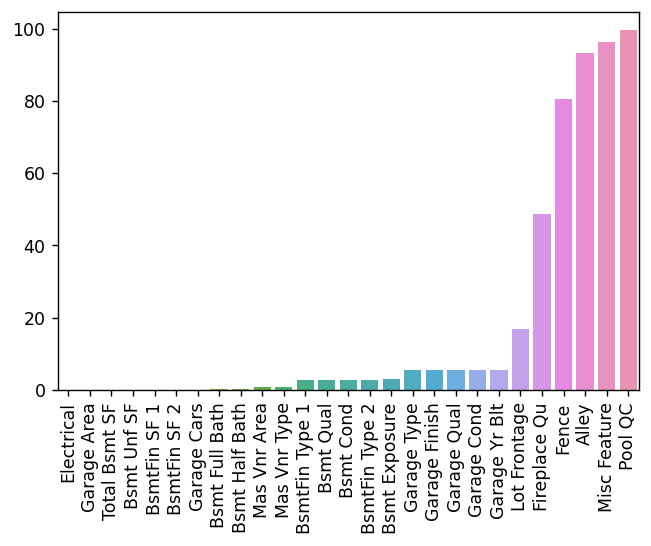

In [9]:
# Plot showing null value percentage column-wise.
plt.figure(
    dpi=125
)
sns.barplot(
    x=percent_nan.index, y=percent_nan
)
plt.xticks(rotation=90);

# Filling_And_Dropping_Based_On_Rows

(0.0, 1.0)

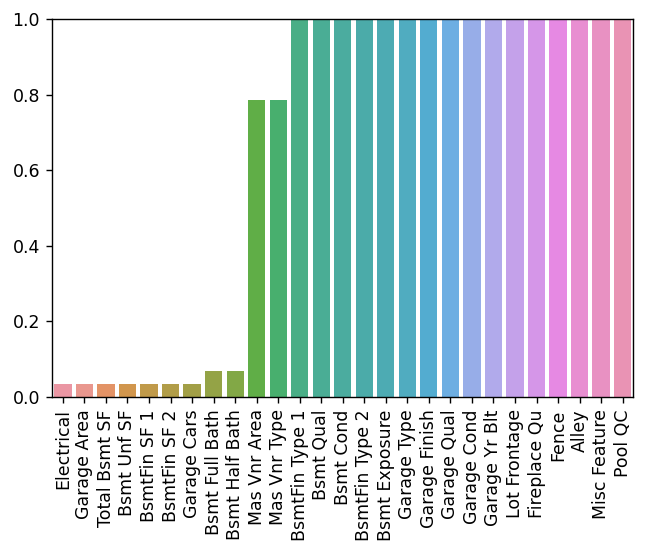

In [10]:
# Plot showing null value percentage column-wise.
plt.figure(
    dpi=125
)
sns.barplot(
    x=percent_nan.index, y=percent_nan
)
plt.xticks(rotation=90)

# to consider the null percent between 0 to 1.
plt.ylim(0, 1)

In [11]:
# Now we will take the features whose percent_nan is less than.
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [12]:
# percent of one row from total number of rows.
100/len(df)

0.0341646737273659

In [13]:
# Electrical's percent_nan is equal to 100/len(df).
# its significant to one row.

In [14]:
# Row having missing Electrical.
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1576,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [15]:
# Row missing Bsmt Half Bath.
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [16]:
df=df.dropna(axis=0, subset=['Electrical', 'Garage Cars'])

In [17]:
percent_nan=percent_missing(df)

In [18]:
percent_nan[percent_nan < 1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

In [19]:
# Bsmt features
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [20]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [21]:
# Since same two rows are not above 2 features.

In [22]:
# BSMT Numeric Columns. --> fill na with zero.
bsmt_num_cols = [
    'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath'
]
df[bsmt_num_cols]=df[bsmt_num_cols].fillna(0)

# BSMT String Columns.
bsmt_str_cols =  [
    'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2'
]
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [23]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [24]:
percent_nan=percent_missing(df)

(0.0, 1.0)

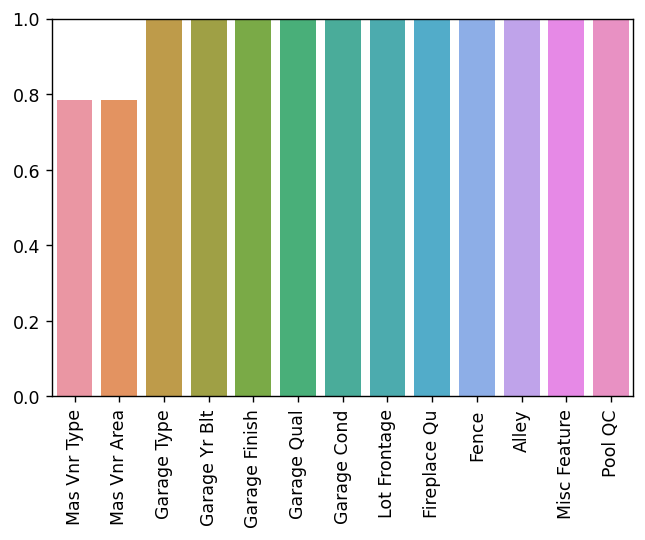

In [25]:
# Plot showing null value percentage column-wise.
plt.figure(
    dpi=125
)
sns.barplot(
    x=percent_nan.index, y=percent_nan
)
plt.xticks(rotation=90)

# to consider the null percent between 0 to 1.
plt.ylim(0, 1)

# Fixing Data Based on Columns

In [26]:
# We will fill the other columns based on the domain knowledge.

In [27]:
df['Mas Vnr Area']=df['Mas Vnr Area'].fillna(0)
df['Mas Vnr Type']=df['Mas Vnr Type'].fillna("None")

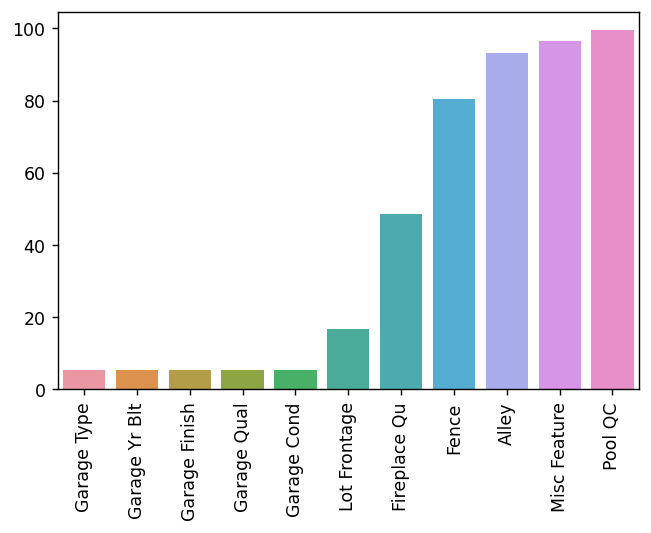

In [28]:
percent_nan=percent_missing(df)

# Plot showing null value percentage column-wise.
plt.figure(
    dpi=125
)
sns.barplot(
    x=percent_nan.index, y=percent_nan
)
plt.xticks(rotation=90);

In [29]:
gar_str_cols = [
    'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond'
]
df[gar_str_cols]=df[gar_str_cols].fillna("None")

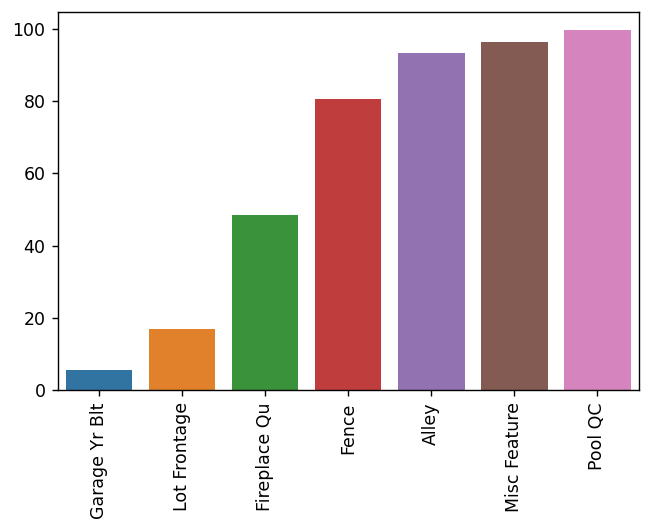

In [30]:
percent_nan=percent_missing(df)

# Plot showing null value percentage column-wise.
plt.figure(
    dpi=125
)
sns.barplot(
    x=percent_nan.index, y=percent_nan
)
plt.xticks(rotation=90);

In [31]:
df['Garage Yr Blt']=df['Garage Yr Blt'].fillna(0)

In [32]:
# We will drop those columns which has large number of data missing.
df=df.drop([
    'Pool QC', 'Misc Feature', 'Alley', 'Fence'
], axis=1)

In [33]:
# Since Fierplace Qu is string.
df['Fireplace Qu']=df['Fireplace Qu'].fillna("None")

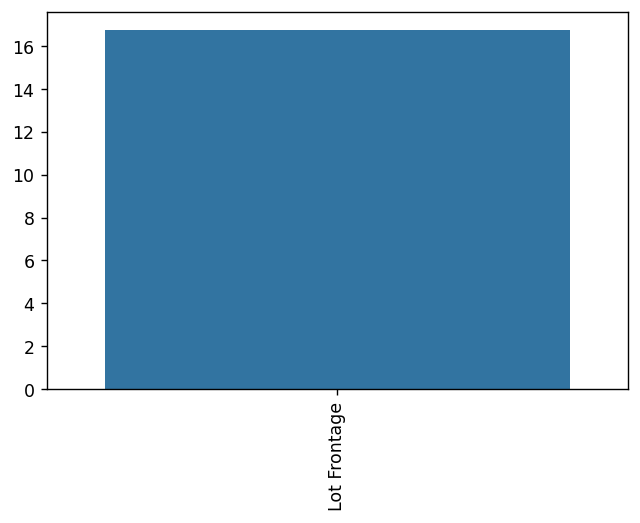

In [34]:
percent_nan=percent_missing(df)

# Plot showing null value percentage column-wise.
plt.figure(
    dpi=125
)
sns.barplot(
    x=percent_nan.index, y=percent_nan
)
plt.xticks(rotation=90);

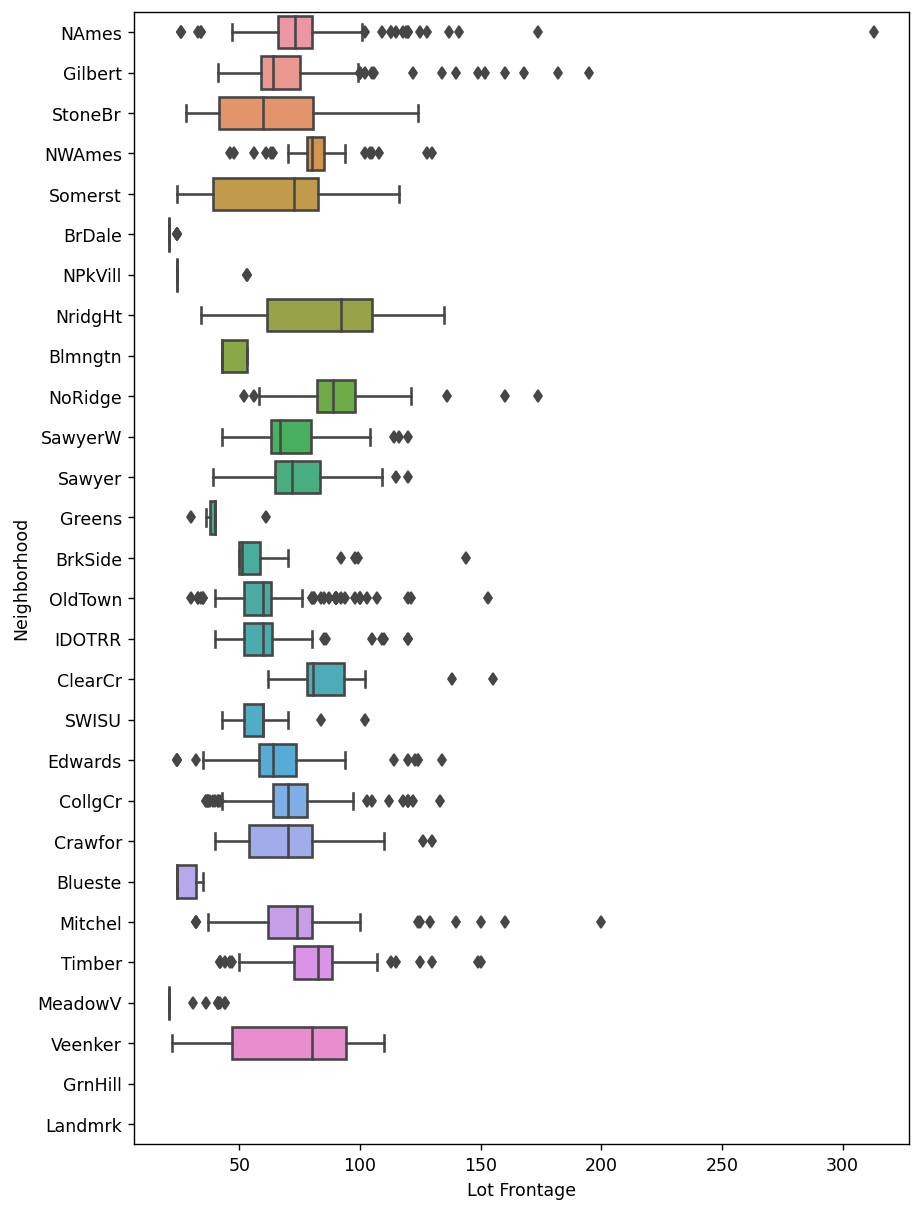

In [35]:
# From description we can get the idea that lot frontage is actually based on the Neighbour Hood
plt.figure(
    figsize=(8, 12),
    dpi=125
)
sns.boxplot(
    x='Lot Frontage', 
    y='Neighborhood', 
    data=df,
    orient='h'
);

In [36]:
# If any data have missing Lot Frontage then we can fill the average of its neighborhood.
# We will use transform which can also be done using apply.
df['Lot Frontage']=df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

In [39]:
# Still 3 values in lot frontage is missing hence,
# This is becuase there is no lot frontage at all in neighborhood.
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [42]:
# We
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [44]:
df.to_csv('./../Outputs/DATA/Ames_no_missing_data.csv')